<a href="https://colab.research.google.com/github/Prajyoti20/DeepLerning/blob/main/Multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
url1='https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/mobile_train.csv'
df=pd.read_csv(url1)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [20]:
df.shape

(2000, 21)

In [21]:
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [22]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [24]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [25]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [26]:
df.duplicated().sum()

0

In [27]:
df['price_range'].unique()

array([1, 2, 3, 0])

In [29]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [28]:
df['price_range'].nunique()

4

In [33]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

### Price range
0 - Cheap
1 - Moderate
2 - High
3 - Very Expensive

4 classes are present in this problem



### **Step 4: Perform preprocessing on X**


### **Seperate X and Y (price_range)**

In [30]:
x=df.drop(['price_range'],axis=1)
y=df['price_range']

In [31]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [32]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [43]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('scalar',StandardScaler())]).set_output(transform='pandas')

In [44]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scalar', StandardScaler())])

### this is applicable to multiclass classification only,get onehotencoding for target feature

In [46]:
pre=num_pipe.fit_transform(x)
pre

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,0.673534,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,-1.140810,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,-1.140810,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,-0.810929,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097


### step 5: Apply train test split

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(pre,y,test_size=0.2,random_state=23)

In [89]:
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1417,1.703773,1.010051,0.463042,-1.019184,-0.992890,-1.043966,0.989655,0.687548,-0.600410,1.521249,1.333295,0.709744,1.558662,-1.168519,-0.072765,-0.405712,-0.917331,0.559641,0.994018,-1.014099
1075,0.479120,-0.990050,-0.885327,0.981177,-0.301703,0.957886,-1.215274,-1.046495,0.105988,-1.539175,0.343653,1.967436,1.461461,-1.007148,-0.547577,-1.324131,-0.551204,0.559641,0.994018,0.986097
929,1.025434,1.010051,1.075937,0.981177,-0.992890,0.957886,-1.049904,1.381165,0.784130,-1.101971,-0.151168,-0.279731,-1.336559,-0.878052,-0.072765,1.201522,1.096367,0.559641,0.994018,0.986097
788,0.597488,-0.990050,-0.517590,-1.019184,1.771858,0.957886,-1.656260,-1.046495,1.320993,-1.539175,0.838474,-1.007749,-0.452486,0.334532,0.164641,1.431127,0.913303,0.559641,0.994018,0.986097
748,-1.002755,-0.990050,1.075937,-1.019184,0.159088,-1.043966,-1.546013,-1.046495,-1.250297,-0.664768,-0.151168,-0.268461,-1.408303,0.775304,0.639453,0.283103,0.547176,0.559641,0.994018,-1.014099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,0.326608,1.010051,-1.253064,-1.019184,0.619880,0.957886,-1.049904,-0.699686,1.660064,-1.101971,1.333295,-0.074623,-1.232414,-0.047224,0.876859,0.283103,-0.368140,0.559641,-1.006018,0.986097
1993,0.520094,1.010051,-1.253064,-1.019184,-0.992890,-1.043966,-0.774288,0.340740,-0.515642,0.209639,-1.635631,0.547461,-0.352970,1.694655,0.639453,1.201522,-1.100394,0.559641,0.994018,0.986097
1064,1.441997,-0.990050,-1.253064,0.981177,-0.301703,-1.043966,-0.829411,0.687548,-1.448088,0.646842,-0.645989,2.488093,1.192999,-1.291161,1.114266,-0.635317,-0.368140,0.559641,-1.006018,0.986097
742,1.328182,-0.990050,-0.395011,-1.019184,-0.992890,-1.043966,-1.325520,-1.046495,1.547040,0.646842,-1.635631,-1.066351,-0.790378,0.417523,-0.784983,-0.176107,-0.551204,0.559641,0.994018,-1.014099


In [91]:
x_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1945,-0.527007,1.010051,1.688833,0.981177,0.159088,0.957886,-0.608919,1.034357,1.264481,1.521249,0.343653,-0.374396,-0.973210,-0.759099,-1.022389,0.053498,0.181050,0.559641,0.994018,-1.014099
912,-1.394279,-0.990050,-1.007906,0.981177,-0.532099,0.957886,-0.498672,-0.006069,1.320993,-1.101971,-0.151168,-1.251174,0.190896,1.229908,-1.259796,-0.176107,-0.002014,0.559641,-1.006018,0.986097
1069,0.399450,-0.990050,1.321096,-1.019184,-0.762495,-1.043966,-0.278179,0.340740,-0.091804,-0.227564,1.663176,0.358131,0.723191,-1.671073,-1.734608,-0.864922,-0.551204,-1.786861,-1.006018,0.986097
517,-0.408639,-0.990050,1.075937,-1.019184,0.850275,-1.043966,1.596010,-1.393304,-0.176571,-0.664768,1.333295,2.181559,1.537833,1.467814,0.639453,1.660732,-0.002014,0.559641,0.994018,-1.014099
1135,0.240108,-0.990050,-0.027274,-1.019184,-0.762495,-1.043966,-0.994781,-0.006069,1.405761,-1.539175,-1.140810,-0.509631,-1.609649,-0.046302,-1.022389,-1.094526,-1.100394,0.559641,0.994018,-1.014099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,0.112635,-0.990050,1.566254,0.981177,2.463046,-1.043966,0.989655,-1.393304,-0.543898,-1.101971,1.663176,1.198846,1.290200,0.926531,1.114266,0.053498,-1.649584,-1.786861,-1.006018,-1.014099
1860,0.927552,-0.990050,1.198517,-1.019184,-0.301703,0.957886,-0.388426,0.340740,1.688320,-1.101971,-0.810929,-0.978448,0.825021,-1.326201,-1.022389,0.053498,-0.002014,0.559641,0.994018,-1.014099
1872,1.152907,-0.990050,1.688833,-1.019184,-0.992890,0.957886,-1.601136,1.381165,-0.995993,-0.664768,-1.635631,-0.493854,0.873622,-0.752644,-1.734608,-1.324131,-1.649584,0.559641,0.994018,-1.014099
789,0.854711,-0.990050,0.463042,-1.019184,0.850275,0.957886,1.265271,-0.699686,1.349249,-0.664768,1.168355,0.484351,0.181639,1.650393,1.114266,1.660732,0.364113,0.559641,-1.006018,-1.014099


In [93]:
y_train.head()

1417    1
1075    1
929     0
788     2
748     2
Name: price_range, dtype: int64

In [94]:
y_test.head()

1945    0
912     2
1069    0
517     3
1135    1
Name: price_range, dtype: int64

In [95]:
x_train.shape

(1600, 20)

In [96]:
x_test.shape

(400, 20)

In [97]:
y_train.shape

(1600,)

In [98]:
y_test.shape

(400,)

In [99]:
y_train


1417    1
1075    1
929     0
788     2
748     2
       ..
950     1
1993    3
1064    1
742     2
595     0
Name: price_range, Length: 1600, dtype: int64

In [100]:
from keras.utils import to_categorical
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [102]:
y_train_cat[0:5]

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [103]:
y_test_cat[0:5]

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [105]:
y_train_cat.shape[1]


4

In [106]:
y_train_cat.shape[1]


4

In [109]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping
from ast import mod

In [112]:
# Initialize model
model= Sequential()
#Create a input layer
model.add(Input(shape=(x_train.shape[1],)))

#create dense layer 1
model.add(Dense(64,activation='relu'))

#Add dropout layer
model.add(Dropout(0.2))

#create dense layer 2
model.add(Dense(32,activation='relu'))

#Add dropout layer
model.add(Dropout(0.1))

#output layer
model.add(Dense(y_train_cat.shape[1],activation='softmax'))

In [113]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3556 (13.89 KB)
Trainable params: 3556 (13.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [114]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [116]:
# Add early stoping
early_stop=EarlyStopping(monitor='val_loss',patience=15)

In [117]:
hist=model.fit(x_train,y_train_cat,epochs=200,validation_data=(x_test,y_test_cat),callbacks=[early_stop])

Epoch 1/200
50/50 [==============================] - 3s 12ms/step - loss: 1.3346 - accuracy: 0.3837 - val_loss: 1.1749 - val_accuracy: 0.5100
Epoch 2/200
50/50 [==============================] - 0s 3ms/step - loss: 1.0913 - accuracy: 0.5269 - val_loss: 0.9389 - val_accuracy: 0.6450
Epoch 3/200
50/50 [==============================] - 0s 3ms/step - loss: 0.8836 - accuracy: 0.6338 - val_loss: 0.7423 - val_accuracy: 0.7475
Epoch 4/200
50/50 [==============================] - 0s 4ms/step - loss: 0.7384 - accuracy: 0.6875 - val_loss: 0.6001 - val_accuracy: 0.8275
Epoch 5/200
50/50 [==============================] - 0s 3ms/step - loss: 0.6179 - accuracy: 0.7456 - val_loss: 0.5002 - val_accuracy: 0.8650
Epoch 6/200
50/50 [==============================] - 0s 3ms/step - loss: 0.5280 - accuracy: 0.8019 - val_loss: 0.4256 - val_accuracy: 0.8900
Epoch 7/200
50/50 [==============================] - 0s 5ms/step - loss: 0.4793 - accuracy: 0.8156 - val_loss: 0.3692 - val_accuracy: 0.8900
Epoch 8/200


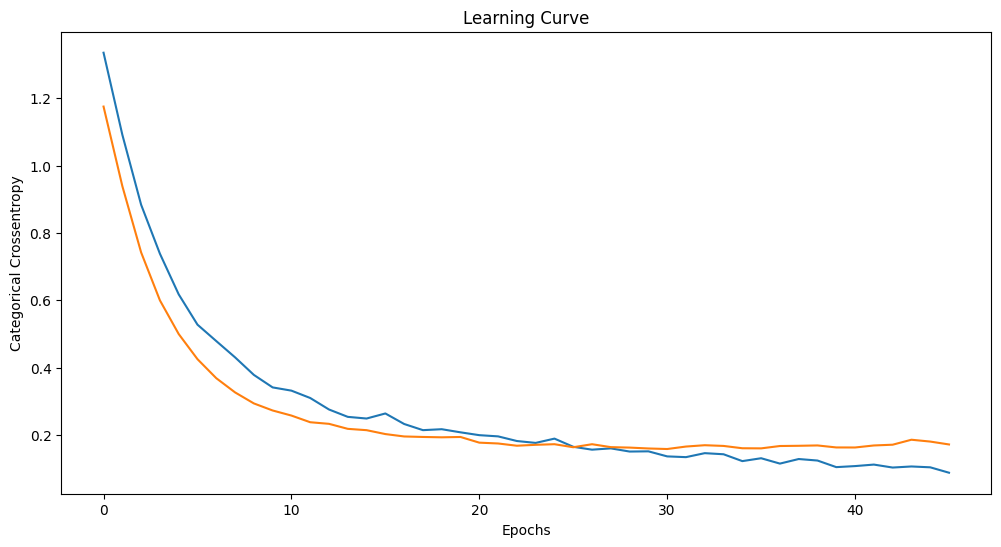

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.title('Learning Curve')
plt.show()


### **Model Evalatuation**


In [120]:
model.evaluate(x_train, y_train_cat)


50/50 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9969


[0.03376272693276405, 0.996874988079071]

In [121]:
model.evaluate(x_test, y_test_cat)


13/13 [==============================] - 0s 3ms/step - loss: 0.1726 - accuracy: 0.9250


[0.17263391613960266, 0.925000011920929]

### **Predict the results for train and test**

In [123]:
yprob_train = model.predict(x_train)
yprob_test = model.predict(x_test)

13/13 [==============================] - 0s 2ms/step


In [124]:
yprob_train[0:5]


array([[1.4407553e-03, 9.9820435e-01, 3.5487898e-04, 1.8675708e-12],
       [2.7535734e-04, 9.9892312e-01, 8.0157974e-04, 1.9227655e-12],
       [9.8328412e-01, 1.6715765e-02, 2.2752489e-09, 2.2774862e-19],
       [2.6862972e-07, 1.0053040e-02, 9.8950827e-01, 4.3842942e-04],
       [1.4766914e-09, 8.8913727e-04, 9.9715644e-01, 1.9543585e-03]],
      dtype=float32)

In [126]:
yprob_test[0:5]

array([[9.9748182e-01, 2.5180900e-03, 6.9046526e-12, 2.4383243e-24],
       [9.2799759e-13, 3.0554222e-06, 9.7944355e-01, 2.0553442e-02],
       [9.9929142e-01, 7.0850400e-04, 1.5185253e-13, 1.9960155e-27],
       [4.6697560e-33, 9.4544391e-22, 2.4458695e-06, 9.9999744e-01],
       [4.9265702e-05, 9.9581933e-01, 4.1313702e-03, 5.0575356e-11]],
      dtype=float32)

In [127]:
import numpy as np
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)


In [128]:
ypred_train[0:5]


array([1, 1, 0, 2, 2])

In [130]:
ypred_test[0:5]

array([0, 2, 0, 3, 1])

In [131]:
y_train.head()


1417    1
1075    1
929     0
788     2
748     2
Name: price_range, dtype: int64

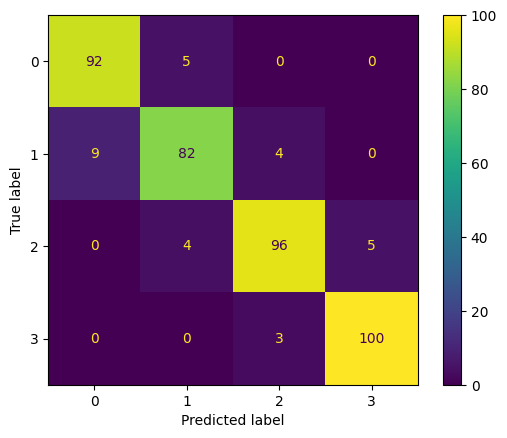

In [133]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [134]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))


              precision    recall  f1-score   support

           0       0.91      0.95      0.93        97
           1       0.90      0.86      0.88        95
           2       0.93      0.91      0.92       105
           3       0.95      0.97      0.96       103

    accuracy                           0.93       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.93      0.92       400



### Because f1-macro is more than 0.8 hence model is a good model


### Out of Sample Predictions


In [135]:
url2 ="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/mobile_test.csv"
xnew = pd.read_csv(url2)
xnew.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [136]:
xnew2 = xnew.drop(columns=['id'])
xnew2.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [137]:
xnew2_pre = num_pipe.transform(xnew2)
xnew2_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.445060,1.010051,0.340463,0.981177,2.232650,-1.043966,-1.490890,-1.393304,1.490528,-0.664768,1.003414,-0.944639,0.371413,1.246506,-0.072765,0.283103,-1.649584,-1.786861,0.994018,-1.014099
1,-0.904874,1.010051,-1.253064,0.981177,-0.071307,0.957886,1.596010,1.034357,1.434017,0.209639,0.343653,0.227403,-0.913037,1.632873,-1.497202,-1.324131,-0.734267,0.559641,-1.006018,-1.014099
2,1.294038,1.010051,1.566254,-1.019184,-0.762495,-1.043966,-0.278179,1.381165,1.292737,-0.664768,-0.975869,1.408462,0.264954,0.250619,1.114266,0.971917,-0.185077,-1.786861,0.994018,0.986097
3,0.699922,-0.990050,-1.253064,0.981177,3.154233,0.957886,-0.388426,-0.006069,-1.250297,1.521249,1.663176,-0.789118,1.158284,1.631029,-0.547577,-1.324131,-0.734267,0.559641,0.994018,-1.014099
4,0.444976,-0.990050,-0.149853,-1.019184,1.541463,0.957886,0.934531,-0.006069,-0.911225,0.646842,1.333295,0.234165,-1.021810,-0.323860,0.639453,0.512708,-0.734267,0.559641,-1.006018,0.986097


In [138]:
probs = model.predict(xnew2_pre)


32/32 [==============================] - 0s 5ms/step


In [139]:
probs[0:5]


array([[7.8590653e-18, 1.8378052e-09, 1.9694883e-01, 8.0305129e-01],
       [3.7793969e-23, 5.6763893e-13, 3.7489563e-02, 9.6251053e-01],
       [7.9608564e-13, 7.0906015e-07, 3.5621116e-01, 6.4378810e-01],
       [2.2580863e-33, 3.5088533e-21, 6.3378138e-06, 9.9999362e-01],
       [7.1969079e-03, 9.9060601e-01, 2.1969350e-03, 2.5227571e-09]],
      dtype=float32)

In [140]:
preds = np.argmax(probs, axis=1)
preds[0:5]

array([3, 3, 3, 3, 1])

In [141]:
max_probs = np.max(probs, axis=1)


In [142]:
max_probs[0:5]


array([0.8030513, 0.9625105, 0.6437881, 0.9999936, 0.990606 ],
      dtype=float32)

In [143]:
df_final = xnew[['id']]
df_final['price_range_pred'] = preds
df_final['prob'] = max_probs
df_final

<ipython-input-143-5c90fb712aa3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['price_range_pred'] = preds
<ipython-input-143-5c90fb712aa3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['prob'] = max_probs


,id,price_range_pred,prob
0,1,3,0.803051
1,2,3,0.962511
2,3,3,0.643788
3,4,3,0.999994
4,5,1,0.990606
...,...,...,...
995,996,2,0.970958
996,997,1,0.994909
997,998,0,0.554665
998,999,2,0.994390


In [144]:
df_final['price_range_pred'].value_counts()


price_range_pred
2    268
0    261
3    258
1    213
Name: count, dtype: int64

<Axes: xlabel='price_range_pred'>

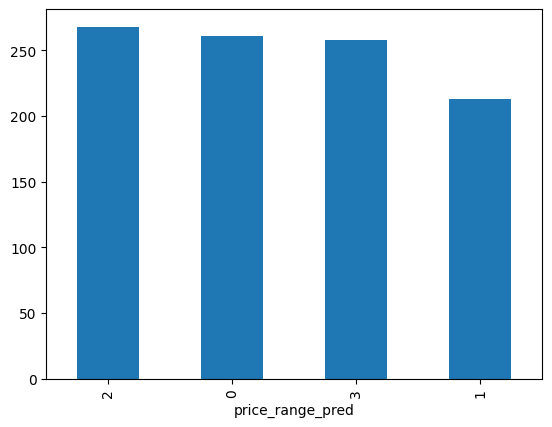

In [145]:
df_final['price_range_pred'].value_counts().plot(kind='bar')


In [ ]:
df_final.to_csv('ResultsMobile.csv', index=False)
